In [128]:
%matplotlib inline
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
sns.set()

In [129]:
# Reading ratings file
ratings_df = pd.read_csv('Resources/ratings.csv')

# Reading users file
users_df = pd.read_csv('Resources/users.csv')

# Reading movies file
movies_df = pd.read_csv('Resources/movies.csv')

In [130]:
ratings_df['Rating'].mean()
ratings_df['Rating'].var()
ratings_df['Rating'].std()

1.117098045911324

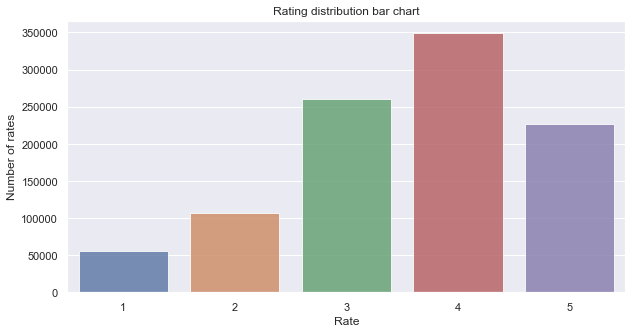

In [131]:
# get rate value counts
rate_count  = ratings_df['Rating'].value_counts()
plt.figure(figsize=(10,5))
# plot barchart for Rating column
sns.barplot(rate_count.index, rate_count.values, alpha=0.8)
plt.title('Rating distribution bar chart')
# set labels
plt.ylabel('Number of rates', fontsize=12)
plt.xlabel('Rate', fontsize=12)
plt.show()
# alternative way ===> ax=sns.countplot(x='Rating', data=ratings_df)

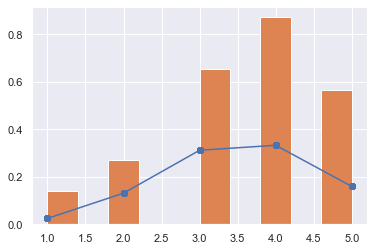

In [132]:
# sorted
h = sorted(ratings_df['Rating'])
# this is a fitting indeed
fit = stats.norm.pdf(h, np.mean(h), np.std(h))
plt.plot(h,fit,'-o')
# use this to draw histogram of your data
plt.hist(h,density=True)
plt.show()

# PCA Detection
Detecting shilling attacks improves security of a recommender system [7]. PCA detection is proposed to detect shilling profiles in a recommender system [9, 15, 14]. PCA is a linear dimensionality reduction method and aims to project original data onto a new space with lower dimensionality and small covariances between any dimensions. A dimension with high covariance with others are regarded as redundant information and are discarded. As a result, redundancy of data is reduced by projecting original data to a new space [24].
Based on the concept that shilling profiles have high covariance with other user profiles, PCA is applied to detect shilling profiles. PCA regards users as dimensions of a user-item ma- trix. Thus, a profile with small linear combination weight is more likely to be a shilling profile. A number of profiles with smallest linear combination weight will be identified as shilling profiles. PCA detection performs well to detect shilling profiles constructed by several usual attack models, such as random at- tack, average attack, and bandwagon attack [9].

<div>
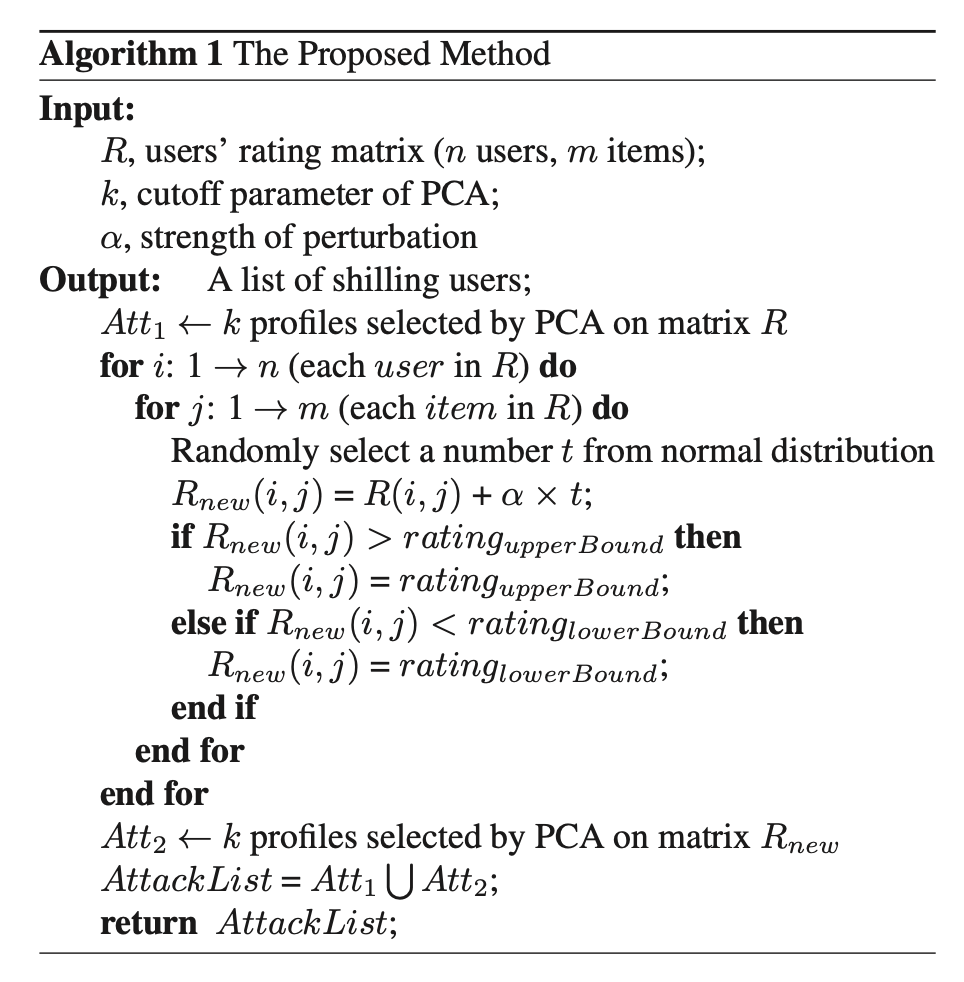
</div>

In [133]:
# R, users’ rating matrix (n users, m items);
ratings_df

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
999227,6040,1091,1,956716541
999228,6040,1094,5,956704887
999229,6040,562,5,956704746
999230,6040,1096,4,956715648


In [187]:
# data_frame=ratings_df.reset_index().pivot_table(index = 'MovieID', columns='UserID',values='Rating')
dataframe=ratings_df.pivot_table(index = 'MovieID', columns = 'UserID', values = 'Rating')
# type(data_frame)
data_mat = np.nan_to_num(dataframe)
data_mat
# data_mat = np.array(data_mat_rev)
# data_frame.columns.values.tolist()
# data_frame
dataframe

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
MovieID,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,4.0,NaN,4.0,5.0,5.0,...,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
from scipy.sparse import csr_matrix
sMatrix = csr_matrix(dataframe)
print(sMatrix)

  (0, 0)	5.0
  (0, 1)	nan
  (0, 2)	nan
  (0, 3)	nan
  (0, 4)	nan
  (0, 5)	4.0
  (0, 6)	nan
  (0, 7)	4.0
  (0, 8)	5.0
  (0, 9)	5.0
  (0, 10)	nan
  (0, 11)	nan
  (0, 12)	nan
  (0, 13)	nan
  (0, 14)	nan
  (0, 15)	nan
  (0, 16)	nan
  (0, 17)	4.0
  (0, 18)	5.0
  (0, 19)	nan
  (0, 20)	3.0
  (0, 21)	nan
  (0, 22)	4.0
  (0, 23)	nan
  (0, 24)	nan
  :	:
  (3706, 6015)	nan
  (3706, 6016)	nan
  (3706, 6017)	nan
  (3706, 6018)	nan
  (3706, 6019)	nan
  (3706, 6020)	nan
  (3706, 6021)	nan
  (3706, 6022)	nan
  (3706, 6023)	nan
  (3706, 6024)	nan
  (3706, 6025)	nan
  (3706, 6026)	nan
  (3706, 6027)	nan
  (3706, 6028)	nan
  (3706, 6029)	nan
  (3706, 6030)	nan
  (3706, 6031)	nan
  (3706, 6032)	nan
  (3706, 6033)	nan
  (3706, 6034)	nan
  (3706, 6035)	nan
  (3706, 6036)	nan
  (3706, 6037)	nan
  (3706, 6038)	nan
  (3706, 6039)	nan


In [189]:
k=20
m=0.2
X=data_mat

In [190]:
pca = PCA(n_components=2)
principalComponents= pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.18632548 0.03515495]
[1543.14244766  670.2906123 ]


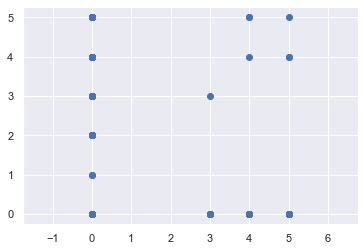

In [191]:
plt.scatter(data_mat[:, 0], data_mat[:, 1])
plt.axis('equal');

,UserID,MovieID,Rating,Timestamp
3431,26,234,3,978140049
6496,48,234,2,978147698
31750,216,234,1,976867580
56742,386,234,1,976303964
64817,438,234,4,976257242
...,...,...,...,...
977328,5896,234,1,957459632
977511,5897,234,1,957451156
982625,5944,234,1,957197567
985275,5955,234,4,957111071


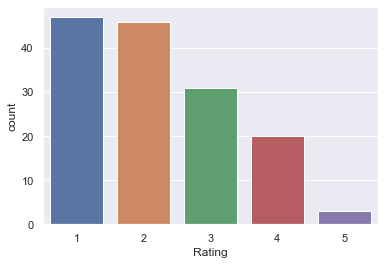

In [262]:
df=ratings_df[(ratings_df.MovieID == 234)]
ax=sns.countplot(x='Rating', data=df)
df

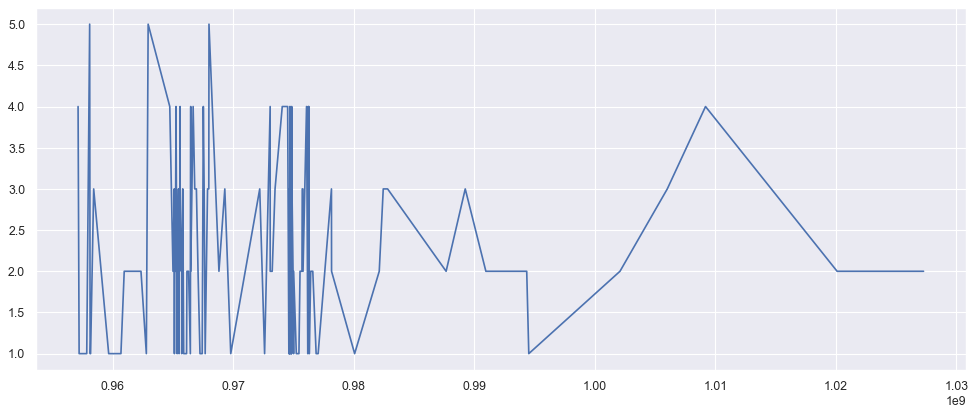

In [263]:
df=df.sort_values(by=['Timestamp'])
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df['Timestamp'], df['Rating']) 

In [264]:
def sample_entropy(time_series, sample_length, tolerance = None):
    """Calculates the sample entropy of degree m of a time_series.

    This method uses chebychev norm.
    It is quite fast for random data, but can be slower is there is
    structure in the input time series.

    Args:
        time_series: numpy array of time series
        sample_length: length of longest template vector
        tolerance: tolerance (defaults to 0.1 * std(time_series)))
    Returns:
        Array of sample entropies:
            SE[k] is ratio "#templates of length k+1" / "#templates of length k"
            where #templates of length 0" = n*(n - 1) / 2, by definition
    Note:
        The parameter 'sample_length' is equal to m + 1 in Ref[1].


    References:
        [1] http://en.wikipedia.org/wiki/Sample_Entropy
        [2] http://physionet.incor.usp.br/physiotools/sampen/
        [3] Madalena Costa, Ary Goldberger, CK Peng. Multiscale entropy analysis
            of biological signals
    """
    #The code below follows the sample length convention of Ref [1] so:
    M = sample_length - 1;

    time_series = np.array(time_series)
    if tolerance is None:
        tolerance = 0.1*np.std(time_series)

    n = len(time_series)

    #Ntemp is a vector that holds the number of matches. N[k] holds matches templates of length k
    Ntemp = np.zeros(M + 2)
    #Templates of length 0 matches by definition:
    Ntemp[0] = n*(n - 1) / 2


    for i in range(n - M - 1):
        template = time_series[i:(i+M+1)];#We have 'M+1' elements in the template
        rem_time_series = time_series[i+1:]

        searchlist = np.arange(len(rem_time_series) - M, dtype=np.int32)
        for length in range(1, len(template)+1):
            hitlist = np.abs(rem_time_series[searchlist] - template[length-1]) < tolerance
            Ntemp[length] += np.sum(hitlist)
            searchlist = searchlist[hitlist] + 1

    sampen =  - np.log(Ntemp[1:] / Ntemp[:-1])
    return sampen


In [265]:
def get_sample_entropy_list(df,chunk_size=5):
    sample_entropy_list=[]
    last_index=0
    while True:
        if last_index+chunk_size > len(df):
            break
        window_df=df[last_index:last_index+chunk_size]
        ts=window_df['Rating'].values
#         if len(np.unique(ts))==1:
#             se=0
#         elif len(np.unique(ts))==5:
#             se=np.log2(5)
#         else:
        std_ts = np.std(ts)
        se = sample_entropy(ts, 1, 0.2 * std_ts)
        se=se[0]
        sample_entropy_list.append(se)
        last_index+=chunk_size
    return sample_entropy_list
sample_entropy_list=get_sample_entropy_list(df,chunk_size=9)
sample_entropy_list

[0.8754687373538999,
 1.0185695809945732,
 1.9740810260220096,
 1.6376087894007967,
 1.3862943611198906,
 1.2809338454620642,
 1.3862943611198906,
 1.1856236656577395,
 1.1856236656577395,
 1.791759469228055,
 1.6376087894007967,
 1.3862943611198906,
 1.2809338454620642,
 1.2809338454620642,
 1.2809338454620642,
 1.3862943611198906]

Text(0.5, 0, 'window index')

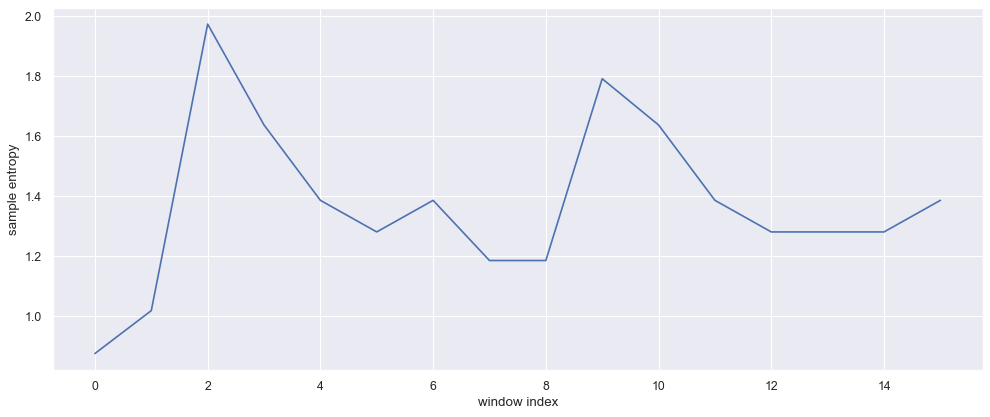

In [266]:
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(sample_entropy_list)),sample_entropy_list)
plt.ylabel('sample entropy', fontsize=12)
plt.xlabel('window index', fontsize=12)

In [267]:
from collections import Counter

def sample_average(time_series):
    """Calculates the sample average of a time_series."""
    my_dict = dict(Counter(time_series))
    S=sum(my_dict.values())
    rate_multiple_repetitions=0
    for key, value in my_dict.items():
        rate_multiple_repetitions+= key*value
    return rate_multiple_repetitions/S

In [268]:
def get_sample_average_list(df,chunk_size=5):
    sample_average_list=[]
    last_index=0
    while True:
        if last_index+chunk_size > len(df):
            break
        window_df=df[last_index:last_index+chunk_size]
        ts=window_df['Rating'].values
        sa= sample_average(ts)
        sample_average_list.append(sa)
        last_index+=chunk_size
    return sample_average_list
sample_average_list=get_sample_average_list(df,chunk_size=9)

Text(0.5, 0, 'window index')

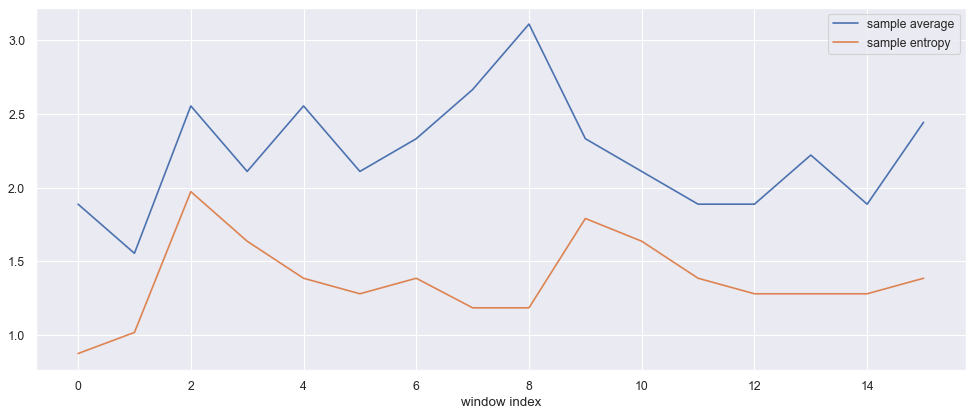

In [269]:
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(sample_average_list)),sample_average_list)
plt.plot(range(len(sample_entropy_list)),sample_entropy_list)
plt.legend(["sample average", "sample entropy"])
plt.xlabel('window index', fontsize=12)

In [270]:
z_score_sample_average_list=stats.zscore(sample_average_list)
z_score_sample_entropy_list=stats.zscore(sample_entropy_list)
z_score_sample_entropy_list

array([-1.85372481, -1.3210387 ,  2.23580738,  0.98330542,  0.04779937,
       -0.34440016,  0.04779937, -0.69918779, -0.69918779,  1.55712402,
        0.98330542,  0.04779937, -0.34440016, -0.34440016, -0.34440016,
        0.04779937])

Text(0.5, 0, 'window index')

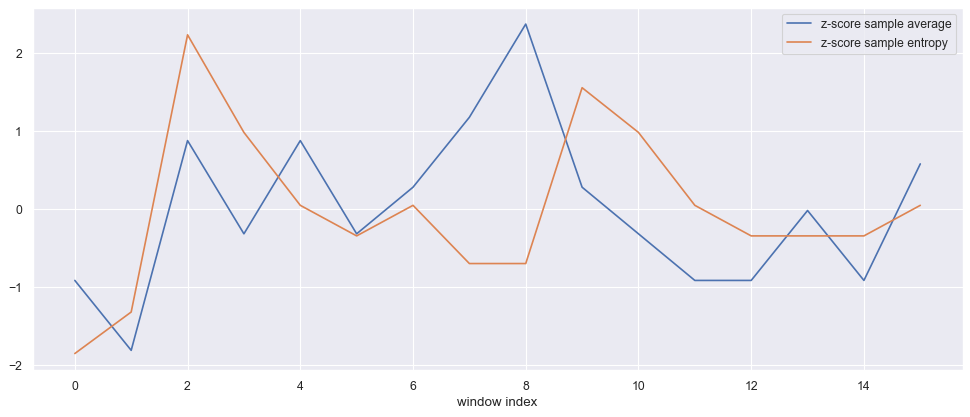

In [271]:
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(z_score_sample_average_list)),z_score_sample_average_list)
plt.plot(range(len(z_score_sample_entropy_list)),z_score_sample_entropy_list)
plt.legend(["z-score sample average", "z-score sample entropy"])
plt.xlabel('window index', fontsize=12)

980

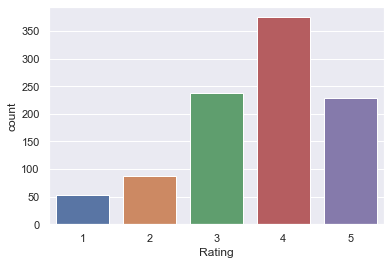

In [272]:
df=ratings_df[(ratings_df.MovieID == 25)]
ax=sns.countplot(x='Rating', data=df)
len(df)

[1.361303137070574,
 1.367692935169345,
 1.3517943491015467,
 1.3773548460810818,
 1.2700544656054291,
 1.3116034685183013,
 1.080010862717564,
 1.4339423207105455,
 1.3903843463714158,
 1.3055611540623389,
 1.3486447401986505,
 1.3903843463714158,
 1.4169639841761277,
 1.194494060371392,
 1.3330437997561708,
 1.033053879629793,
 1.4002691056039578,
 1.3871110210264466,
 1.3392549998488117]

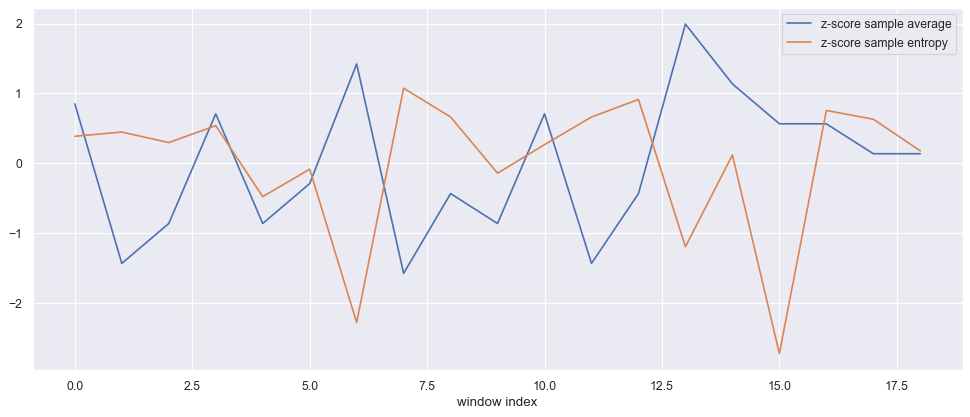

In [278]:
sample_entropy_list=get_sample_entropy_list(df,chunk_size=50)
sample_average_list=get_sample_average_list(df,chunk_size=50)
z_score_sample_average_list=stats.zscore(sample_average_list)
z_score_sample_entropy_list=stats.zscore(sample_entropy_list)
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(len(z_score_sample_average_list)),z_score_sample_average_list)
plt.plot(range(len(z_score_sample_entropy_list)),z_score_sample_entropy_list)
plt.legend(["z-score sample average", "z-score sample entropy"])
plt.xlabel('window index', fontsize=12)
sample_entropy_list